In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.sample(10)

,target,text
756,1,"Dear SBI User, your A/c X5121-debited by Rs45...."
609,1,"Dear SBI User, your A/c X5121-debited by Rs30...."
287,0,Balance for Jio Number 9834812916: 1) Rs 749-9...
559,0,"Dear Customer,Your mobile number is not regist..."
422,0,Congratulation! Rs.2000/- in Your Rummy Accoun...
238,0,"Dear Gaana User, attempt to renew your subscri..."
57,0,Receive Rs.1500* Bonus\n\n\n\nGUJ vs LCKW T20 ...
526,0,"Order Delivered: Hi Ashish, Smile, your Mamaea..."
506,0,Out for Delivery: HIGHLANDER Men Mustard... wi...
354,0,50% Daily Data quota used as on 25-Oct-22 19:0...


In [4]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [5]:
df.shape

(802, 2)

In [6]:
# check for duplicate values
df.duplicated().sum()

48

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(754, 2)

In [10]:
df.head()

,target,text
0,0,Insurance Agent ya Contract Killer? Janiye Bob...
1,0,50% ALERT: for your daily Data usage. Recharge...
2,0,"Dear Gaana User, purchase of your subscription..."
3,0,Balance for Jio Number 9834812916: 1) Rs 299-1...
4,0,Balance for Jio Number 9834812916: 1) Rs 299-1...


In [11]:
df['target'].value_counts()

0    534
1    220
Name: target, dtype: int64

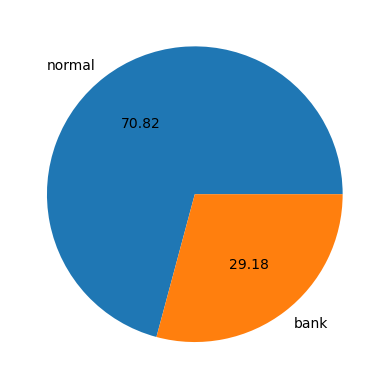

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['normal','bank'],autopct="%0.2f")
plt.show()

In [13]:
import nltk

In [14]:
!pip install nltk

In [15]:
# num of characters
df['num_characters'] = df['text'].apply(len) # len returns num of characters

In [16]:
df.head()

,target,text,num_characters
0,0,Insurance Agent ya Contract Killer? Janiye Bob...,159
1,0,50% ALERT: for your daily Data usage. Recharge...,125
2,0,"Dear Gaana User, purchase of your subscription...",167
3,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348
4,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348


In [17]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,target,text,num_characters,num_words
0,0,Insurance Agent ya Contract Killer? Janiye Bob...,159,30
1,0,50% ALERT: for your daily Data usage. Recharge...,125,25
2,0,"Dear Gaana User, purchase of your subscription...",167,25
3,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348,67
4,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348,67


In [19]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Insurance Agent ya Contract Killer? Janiye Bob...,159,30,3
1,0,50% ALERT: for your daily Data usage. Recharge...,125,25,3
2,0,"Dear Gaana User, purchase of your subscription...",167,25,1
3,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348,67,2
4,0,Balance for Jio Number 9834812916: 1) Rs 299-1...,348,67,2


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,754.000000,754.000000,754.000000
mean,198.733422,38.370027,2.736074
std,125.482820,26.613504,1.585324
min,2.000000,1.000000,1.000000
25%,138.000000,25.000000,2.000000
50%,156.000000,29.000000,2.000000
75%,211.000000,40.000000,4.000000
max,734.000000,168.000000,28.000000


In [22]:
# normal
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,534.000000,534.000000,534.000000
mean,209.889513,41.050562,2.616105
std,146.538141,31.043020,1.701065
min,2.000000,1.000000,1.000000
25%,127.000000,22.000000,2.000000
50%,156.000000,29.000000,2.000000
75%,302.000000,60.000000,3.750000
max,734.000000,168.000000,28.000000


In [23]:
#bank
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,220.000000,220.000000,220.000000
mean,171.654545,31.863636,3.027273
std,28.952468,5.468010,1.216020
min,82.000000,18.000000,1.000000
25%,150.000000,28.000000,2.000000
50%,168.000000,32.000000,2.000000
75%,196.250000,36.250000,4.000000
max,282.000000,52.000000,6.000000


In [24]:
# Model creation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [25]:
X = tfidf.fit_transform(df['text']).toarray()

In [26]:
y = df['target'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [30]:
# Gaussian Naive Bayes is used in cases when all our features are continuous.
gnb = GaussianNB()

# Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to 
# represent). In text learning we have the count of each word to predict the class or label.
mnb = MultinomialNB()

# It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not 
# occur in the document” and 1s as "word occurs in the document" .
bnb = BernoulliNB()

In [31]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9668874172185431
[[105   4]
 [  1  41]]
0.9111111111111111


In [32]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9933774834437086
[[108   1]
 [  0  42]]
0.9767441860465116


In [33]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9933774834437086
[[108   1]
 [  0  42]]
0.9767441860465116


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost

In [35]:
from xgboost import XGBClassifier

In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [37]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [38]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [39]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9867549668874173, 0.9761904761904762)

In [40]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9867549668874173
Precision -  0.9761904761904762
For  KN
Accuracy -  0.9867549668874173
Precision -  0.9545454545454546
For  NB
Accuracy -  0.9933774834437086
Precision -  0.9767441860465116


C:\Users\rajth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  DT
Accuracy -  0.9735099337748344
Precision -  0.9130434782608695
For  LR
Accuracy -  0.9735099337748344
Precision -  0.975
For  RF
Accuracy -  0.9801324503311258
Precision -  0.975609756097561
For  AdaBoost
Accuracy -  0.9867549668874173
Precision -  0.9761904761904762
For  BgC
Accuracy -  0.9867549668874173
Precision -  0.9545454545454546
For  ETC
Accuracy -  0.9867549668874173
Precision -  0.9761904761904762
For  GBDT
Accuracy -  0.9867549668874173
Precision -  0.9761904761904762
For  xgb
Accuracy -  0.9801324503311258
Precision -  0.9534883720930233


In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [42]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.993377,0.976744
0,SVC,0.986755,0.976190
6,AdaBoost,0.986755,0.976190
8,ETC,0.986755,0.976190
9,GBDT,0.986755,0.976190
5,RF,0.980132,0.975610
4,LR,0.973510,0.975000
1,KN,0.986755,0.954545
7,BgC,0.986755,0.954545
10,xgb,0.980132,0.953488


In [48]:
# input_sms = "Dear SBI User, your A/c X5121-debited by Rs15.0 on 28Dec22 transfer to CHINTAMANI Ref No 236226601917. If not done by u, fwd this SMS to 9223008333/Call 1800111109 or 09449112211 to block UPI -SBI"
input_sms = "Hey there, how are you?"
vector_input = tfidf.transform([input_sms])
ans = bnb.predict(vector_input)[0]
if ans == 1:
    print("Bank SMS")
else:
    print("Normal SMS")

Normal SMS
